In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print('All libraries imported !!!')

Matplotlib is building the font cache; this may take a moment.


All libraries imported !!!


In [3]:
#Read csv files
df_citydata = pd.read_csv(r"city_data.csv")
df_citylist=pd.read_csv(r"city_list.csv")
df_globaldata=pd.read_csv(r"global_data.csv")

print('All csv files are read !!!')

All csv files are read !!!


In [4]:
# Viewing first 5 lines from each dataframe
df_citydata.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [5]:
df_citylist.head()

,city,country
0,Berlin,Germany
1,Hamburg,Germany
2,Munich,Germany


In [6]:
df_globaldata.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [7]:
df_globaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [8]:
df_citydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70792 entries, 0 to 70791
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      70792 non-null  int64  
 1   city      70792 non-null  object 
 2   country   70792 non-null  object 
 3   avg_temp  68245 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [9]:
df_citylist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   city     3 non-null      object
 1   country  3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [10]:
missing_data = df_citydata["avg_temp"].isna()
sum(missing_data)

2547

In [11]:
len(df_citydata[missing_data]["city"].unique()) #number of unique city names which belong to these NaN

235

In [12]:
df_munich=df_citydata[df_citydata["city"] == "Munich"]
df_munich.head()

,year,city,country,avg_temp
43821,1743,Munich,Germany,1.32
43822,1744,Munich,Germany,6.09
43823,1745,Munich,Germany,-2.15
43824,1746,Munich,Germany,NaN
43825,1747,Munich,Germany,NaN


In [13]:
#finding and counting number of NaNs
sum(df_munich["avg_temp"].isna())

4

In [14]:
df_munich[df_munich["avg_temp"].isna()]["year"]

43824    1746
43825    1747
43826    1748
43827    1749
Name: year, dtype: int64

In [15]:
#minimum average temperature and the oldest year in df_globaldata dataframe
print('Oldest year in df_globaldata dataframe = ',df_globaldata["year"].min())
print('Lowest temperature in df_globaldata dataframe = ',df_globaldata["avg_temp"].min())

Oldest year in df_globaldata dataframe =  1750
Lowest temperature in df_globaldata dataframe =  5.78


In [16]:
#maximum average temperature and the latest year in df_globaldata dataframe
print('latest year in df_globaldata dataframe = ',df_globaldata["year"].max())
print('highest temperature in df_globaldata dataframe = ',df_globaldata["avg_temp"].max())

latest year in df_globaldata dataframe =  2015
highest temperature in df_globaldata dataframe =  9.83


In [17]:
df_munich_plot = df_citydata[(df_citydata["city"] == "Munich") & (df_citydata["year"] >= 1750)].copy()
df_globaldata_plot = df_globaldata[df_globaldata["year"] < 2014].copy()

In [18]:
# Checking whether both the dataframes have same size or not
len(df_globaldata_plot) == len(df_munich_plot)

True

In [19]:
#calculate the Moving Average 
df_munich_plot["moving_avg"] = df_munich_plot["avg_temp"].rolling(window = 10).mean()

#reset the index of the df_munich_plot dataframe
df_munich_plot.reset_index(inplace = True, drop = True)

#calculate the Moving Average for the df_globaldata_plot dataframe
df_globaldata_plot["moving_avg"] = df_globaldata_plot["avg_temp"].rolling(window = 10).mean()

In [20]:
# Display
df_munich_plot[10:20]

,year,city,country,avg_temp,moving_avg
10,1760,Munich,Germany,5.02,4.174
11,1761,Munich,Germany,4.94,4.114
12,1762,Munich,Germany,4.49,4.510
13,1763,Munich,Germany,4.25,4.474
14,1764,Munich,Germany,4.82,4.523
15,1765,Munich,Germany,4.52,4.570
16,1766,Munich,Germany,4.28,4.534
17,1767,Munich,Germany,3.85,4.489
18,1768,Munich,Germany,3.84,4.490
19,1769,Munich,Germany,4.43,4.444


In [21]:
print('Global Lowest temperature = ',df_globaldata_plot["avg_temp"].min())
print('Global Highest temperature = ',df_globaldata_plot["avg_temp"].max())
print('Lowest temperature in Munich  = ',df_munich_plot["avg_temp"].min())
print('Highest temperature in Munich  = ',df_munich_plot["avg_temp"].max())

Global Lowest temperature =  5.78
Global Highest temperature =  9.73
Lowest temperature in Munich  =  0.53
Highest temperature in Munich  =  6.64


In [22]:
df_extremetemp=pd.DataFrame({'Highest Temprature':[df_globaldata_plot["avg_temp"].max(),df_munich_plot["avg_temp"].max()],
               'Lowest Temperature':[df_globaldata_plot["avg_temp"].min(),df_munich_plot["avg_temp"].min()]},index=["Global","Munich"])
df_extremetemp.head()

,Highest Temprature,Lowest Temperature
Global,9.73,5.78
Munich,6.64,0.53


In [23]:
df_globaldata_plot["avg_temp"].corr(df_munich_plot["avg_temp"])

0.559655292958634

Text(0, 0.5, 'Temperature in Degree Celcius')

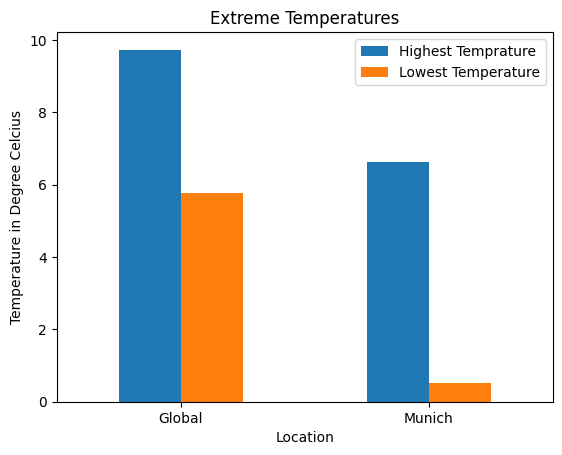

In [24]:
ax=df_extremetemp.plot.bar(rot=0)
ax.set_title("Extreme Temperatures")
ax.set_xlabel('Location')
ax.set_ylabel('Temperature in Degree Celcius')

<AxesSubplot: xlabel='year', ylabel='avg_temp'>

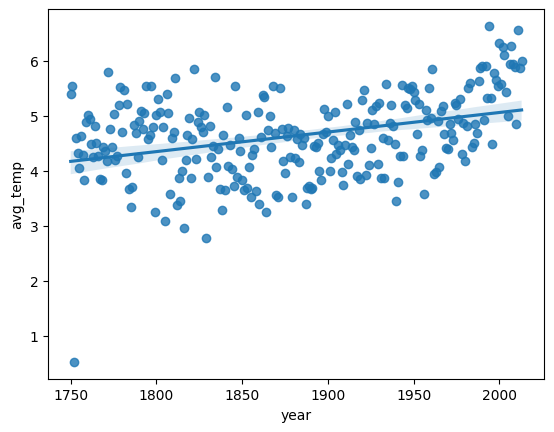

In [25]:
sns.regplot(x="year", y="avg_temp", data=df_munich_plot)

<AxesSubplot: xlabel='year', ylabel='avg_temp'>

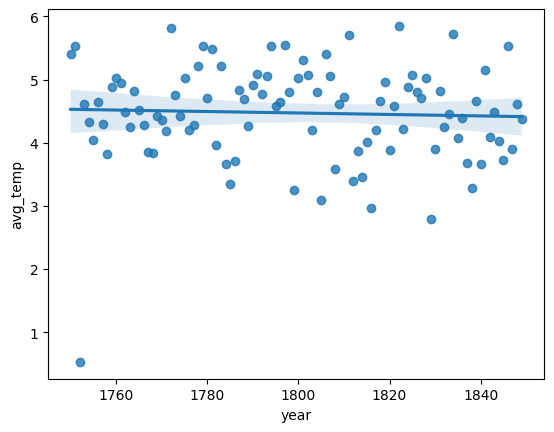

In [26]:
sns.regplot(x="year", y="avg_temp", data=df_munich_plot[df_munich_plot["year"]<1850])

<AxesSubplot: xlabel='year', ylabel='avg_temp'>

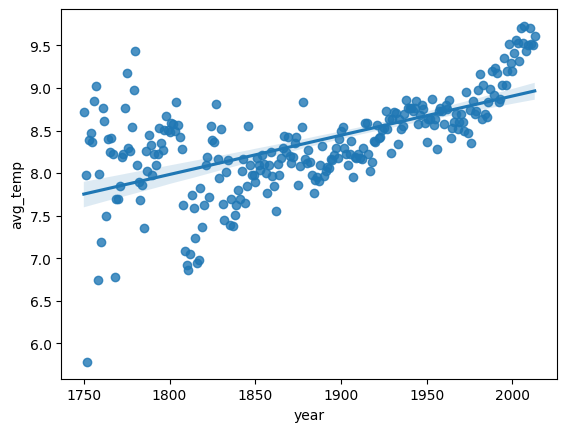

In [27]:
sns.regplot(x="year", y="avg_temp", data=df_globaldata_plot)

<AxesSubplot: xlabel='year', ylabel='avg_temp'>

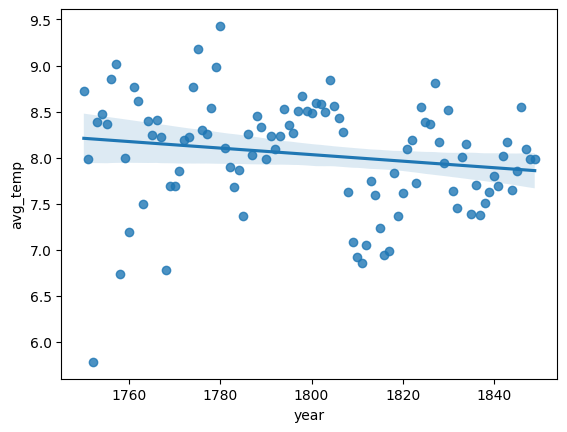

In [28]:
sns.regplot(x="year", y="avg_temp", data=df_globaldata_plot[df_globaldata_plot["year"]<1850])

[Text(0.5, 1.0, 'Munich Temperature Variation Trend')]

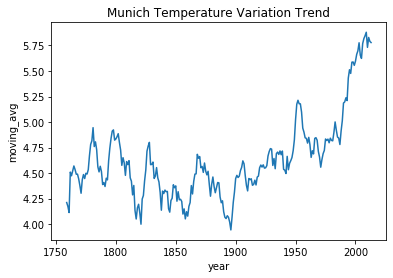

In [ ]:
ax1=sns.lineplot(x='year',y='moving_avg',data=df_munich_plot)
ax1.set(title='Munich Temperature Variation Trend')

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Temperature'),
 Text(0.5, 1.0, 'Temperature Trends')]

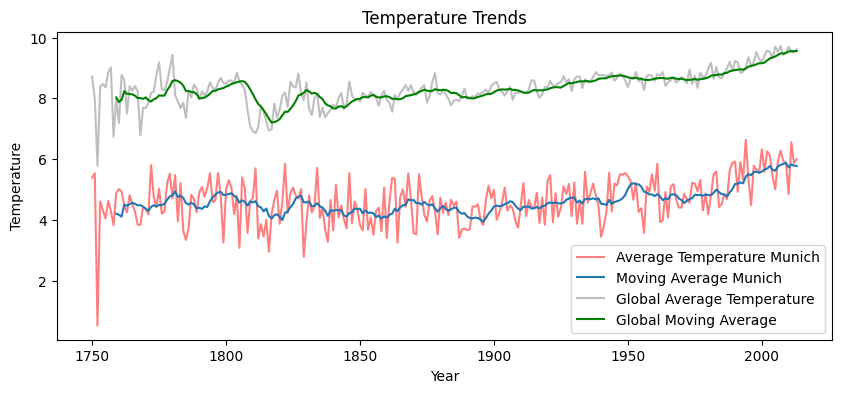

In [30]:
ax=plt.figure(figsize=(10,4))
ax=sns.lineplot(x='year',y='avg_temp',data=df_munich_plot,alpha=0.5,color='red',label='Average Temperature Munich')
ax=sns.lineplot(x='year',y='moving_avg',data=df_munich_plot,label='Moving Average Munich')
ax=sns.lineplot(x='year',y='avg_temp',data=df_globaldata_plot,alpha=0.5,color='grey',label='Global Average Temperature')
ax=sns.lineplot(x='year',y='moving_avg',data=df_globaldata_plot,color='green',label='Global Moving Average')
ax.set(xlabel='Year',ylabel='Temperature', title='Temperature Trends')















.